# Introdução a séries temporais

Uma série temporal é definica como um conjunto de valores que se modificam com o tempo.

Exemplo:
* Valores de ativos na bolsa de valores
* População de um país
* Demandas de determinado produto

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Para trabalharmos com séries temporais, utilizaremos um exemplo de trendding topics de pesquisas na internet.

In [4]:
dados = pd.read_csv('timeline.csv')

Abaixo temos as 5 primeiras linhas da tabela, contendo o mês e a medida de procura de três tópicos (dieta, academia e finanças)

In [5]:
dados.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


## Trabalhando com datas

Executando o comando ".info()" é possível observar que a coluna "month" foi interpretada como tipo "object".

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
month      168 non-null object
diet       168 non-null int64
gym        168 non-null int64
finance    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


O primeiro passo para a análise de séries temporais é a conversão da coluna "month" para o tipo especial "datetime". Para tanto, utilizaremos a função "pd.to_datetime()".

In [6]:
dados.month = pd.to_datetime(dados.month)

Em seguida, transformaremos a coluna "month" como a coluna indexadora dos demais utilizando o comando "set_index()". 

In [7]:
dados.set_index('month', inplace=True)

O efeito dessa transformação é a criação de um novo index do tipo "datetime".

In [12]:
dados[dados.index.weekday == 0]

,diet,gym,finance
month,,,
2004-03-01,67,24,47
2004-11-01,50,23,43
2005-08-01,51,28,44
2006-05-01,50,26,45
2007-01-01,57,35,46
2007-10-01,43,28,52
2008-09-01,42,33,61
2008-12-01,38,27,50
2009-06-01,47,28,55


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
diet       168 non-null int64
gym        168 non-null int64
finance    168 non-null int64
dtypes: int64(3)
memory usage: 5.2 KB


## Plotando séries temporais
Inicialmente faremos a plotagem dos três trendding topics. Para plotar todos os dados utilizando um único comando basta utilizar o comando "plot()" diretamente no dataframe. Como o nosso index foi modificado para ser a coluna "month", o pacote já entende que o eixo $x$ (variável independente) está associado às datas.

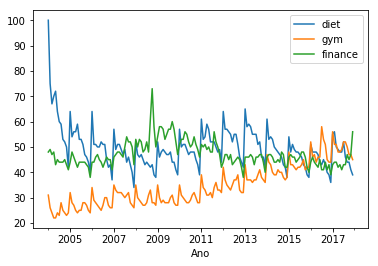

In [10]:
dados.plot()
plt.xlabel('Ano')
plt.show()

Observamos três comportamentos distintos. Aparetemente, a frequência de pesquisas sobre dieta teve uma diminuição desde o início de 2004 até o final de 2017. Já a frequência de pesquisas sobre academia aparenta ter subido durante o mesmo intervalo de tempo. As pequisas sobre finanças se manteram aparentemente estáveis durante durante os 13 anos.

## Analisando tendências
Faremos a análise somente das pesquisas sobre dieta. Observe que, por conta da ocilação das pesquisas, fica difícil de confirmar qualquer tipo de tendência na frequência de pesquisa. Essas ocilações são provocadas pela sazonalidade das pesquisas.

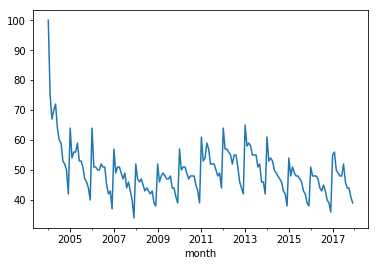

In [8]:
dados.diet.plot()

### Média móvel simples (MMS)
Uma das técnicas comuns para eliminação da sazonalidade é a aplicação das médias móveis (em inglês rolling averages). 

Considere a série temporal $Z_1, Z_2, \ldots, Z_n$.
A técnica da média móvel consiste em calcular a média aritmética das $k$ observações mais recentes, ou seja

$$M_t = \frac{Z_t, Z_{t-1}, \ldots, Z_{t-k+1}}{k}$$

Detonamos por $k$ como sendo o comprimento da média.

Faremos primeiro uma cópia somente dos valores da dieta.

In [11]:
diet = dados.diet

Para plotar as médias móveis para $k=12$, utilizamos o comando "rolling($k$).mean().plot()".

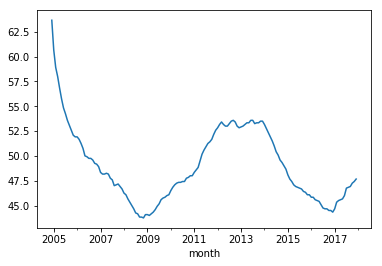

In [17]:
diet.rolling(12).mean().plot()

Analisando o gráfico das médias móveis é possível observar com mais clareza que a pesquisa sobre dieta estava em alta no início de 2004 e sofreu queda até o fina de 2008. De 2009 até 2012 teve mais um crescimento ficando estável até 2014, onde sofreu mais uma queda até 2017.

## Analisando sazonalidade
Ao contrário da análise de tendência, para analisar a sazonalidade das pesquisas sobre dieta, precisaremos eliminar a tendência. Para tanto utilizamos o conceito de diferenças.
### Diferenças
O procedimento utilizado para eliminar a tendência é conhecido na literatura como procedimento para transformação de uma série não estacionária em uma série estacionária. 

A transformação mais comum consiste em tomar diferenças sucessivas da série originalm até se obter uma série estacionária. A primeira diferença $Z(t)$ é definida por

$$\Delta Z(t) = Z(t) - Z(t-1)$$

então a segunda diferença é,

$$\Delta^2 Z(t)=\Delta[\Delta Z(t)]=\Delta[Z(t) - Z(t - 1)]$$
$$\Delta^2 Z(t)=Z(t) - 2 Z(t - 1) + Z(t -2)$$

De modo geral, a n-ésima diferença de $Z(t)$ é

$$\Delta^n Z(t) = \Delta[\Delta^{n - 1}Z(t)]$$

Normalmente, será necessária somente uma ou duas diferenças para que a série se torne estacionária.

Para plotar as $n$ diferenças, utilizamos o comando "diff($n$)"

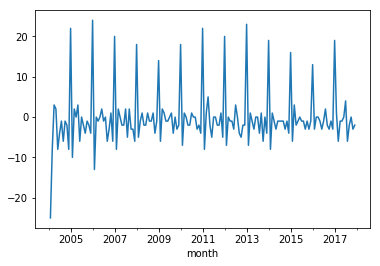

In [27]:
diet.diff(1).plot()

Para o caso estudado, somente uma diferença foi suficiente para tornar a série estacionária.

Obervando o gráfico acima é possível perceber "picos" e "vales" recorrrentes. Para melhorar a visualização, filtraremos os dados de 2005-01 até 2007-12.

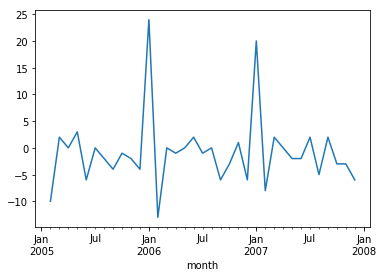

In [42]:
intervalo = (diet.index >= '2005-01') & (diet.index < '2008-01') 
diet.loc[intervalo].diff().plot()

A partir do gráfico acima percebe-se um padrão de comportamento sazonal, onde em janeiro existe um pico nas pesquisas sobre dieta seguido de uma queda brusca em fevereiro. Durante o restante do ano as pesquisas se mantêm estáveis.